In [ ]:
import torch

In [4]:
print("is Cuda available", torch.cuda.is_available())

is Cuda available False


In [4]:
x1= torch.tensor([[1,2,3],[4,5,6]])

In [6]:
x=torch.arange(9)
x.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [7]:
device= torch.device("cuda")

In [9]:
x_gpu= x.to(device)

In [10]:
x_gpu

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8], device='cuda:0')

In [11]:
x= torch.tensor([2.0,3.0], requires_grad=True)

In [12]:
y= x**2 + 3*x

In [13]:
y.sum().backward()

In [14]:
print(x.grad)

tensor([7., 9.])


In [3]:
# pip install --upgrade FastAI

In [4]:
import pandas as pd
import timm
from fastai.vision.all import *

ImportError: cannot import name 'GradScaler' from 'torch.amp' (C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\amp\__init__.py)

In [26]:
train_df=pd.read_csv("train_labels.csv")

In [27]:
# def link("image"):

In [28]:
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value)
# cpu  vars
    random.seed(seed_value)
 # Python
    if use_cuda:
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
# gpu vars
        torch.backends.cudnn.deterministic = True
 #needed
        torch.backends.cudnn.benchmark = False
#Remember to use num_workers=0 when creating the DataBunch.

In [30]:
train_df.head()

image  target
0  tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg       0
1  rxgismgsvmaayzjarbfjaljhqmpbrt.jpg       1
2  uuzshfrhkgrkolhwdvliqauzulurnz.jpg       0
3  mjspxsagzusaznvnyxgamtrlqkqklp.jpg       0
4  rlbmuajgezfiddjzlyeoupxpqubkpt.jpg       1

In [35]:
Nosemask = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=TrainTestSplitter(0.1, stratify=train_df["target"]),
  get_x = ColReader(0, pref = "images/images/" ),
    get_y=ColReader(1),
                   item_tfms = Resize(460),
                 batch_tfms = aug_transforms(do_flip=True,flip_vert=True,max_lighting=0.4,max_zoom=1.2,max_warp=0.2,max_rotate=30,xtra_tfms=None)
)

In [36]:
dls = Nosemask.dataloaders(train_df, bs=32, num_workers=0)

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


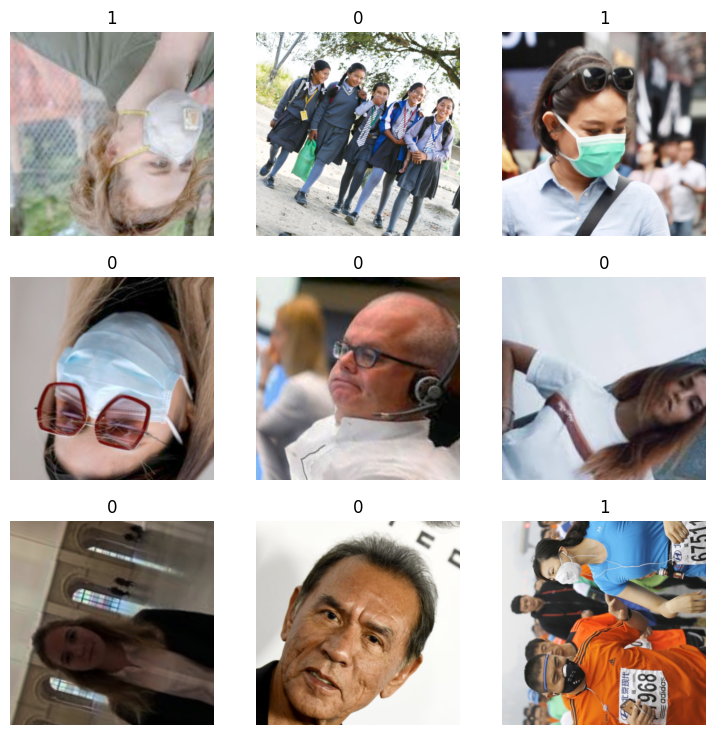

In [38]:
dls.show_batch()

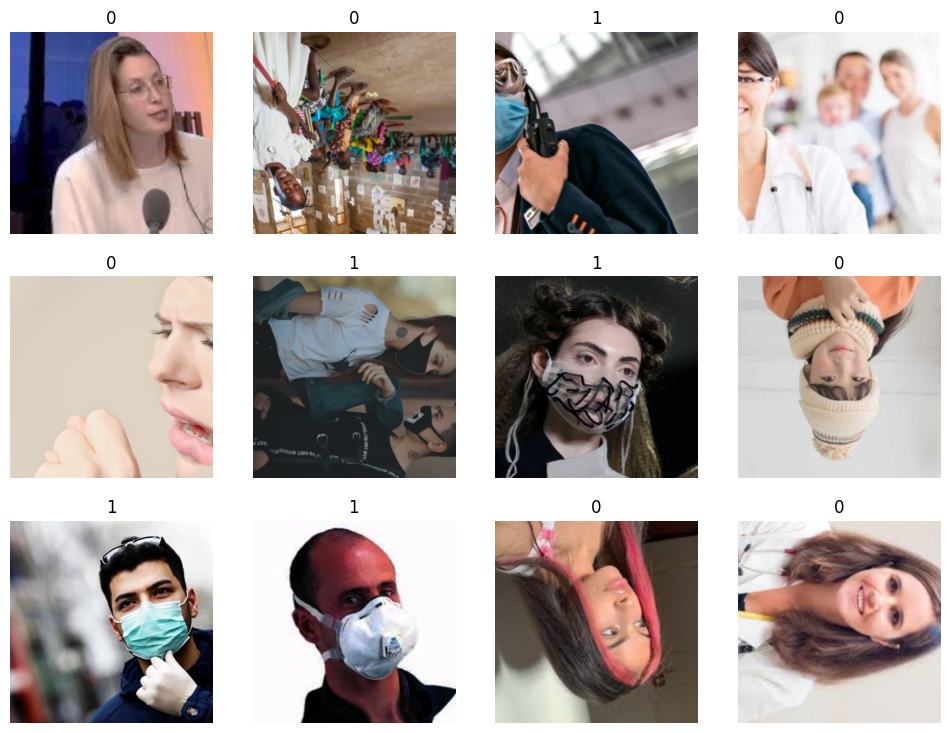

In [39]:
dls = dls.new(item_tfms=Resize(512, ResizeMethod.Pad, pad_mode='zeros'), batch_tfms = aug_transforms(do_flip=True,flip_vert=True,max_lighting=0.4))
dls.show_batch(max_n=12, nrows=3)

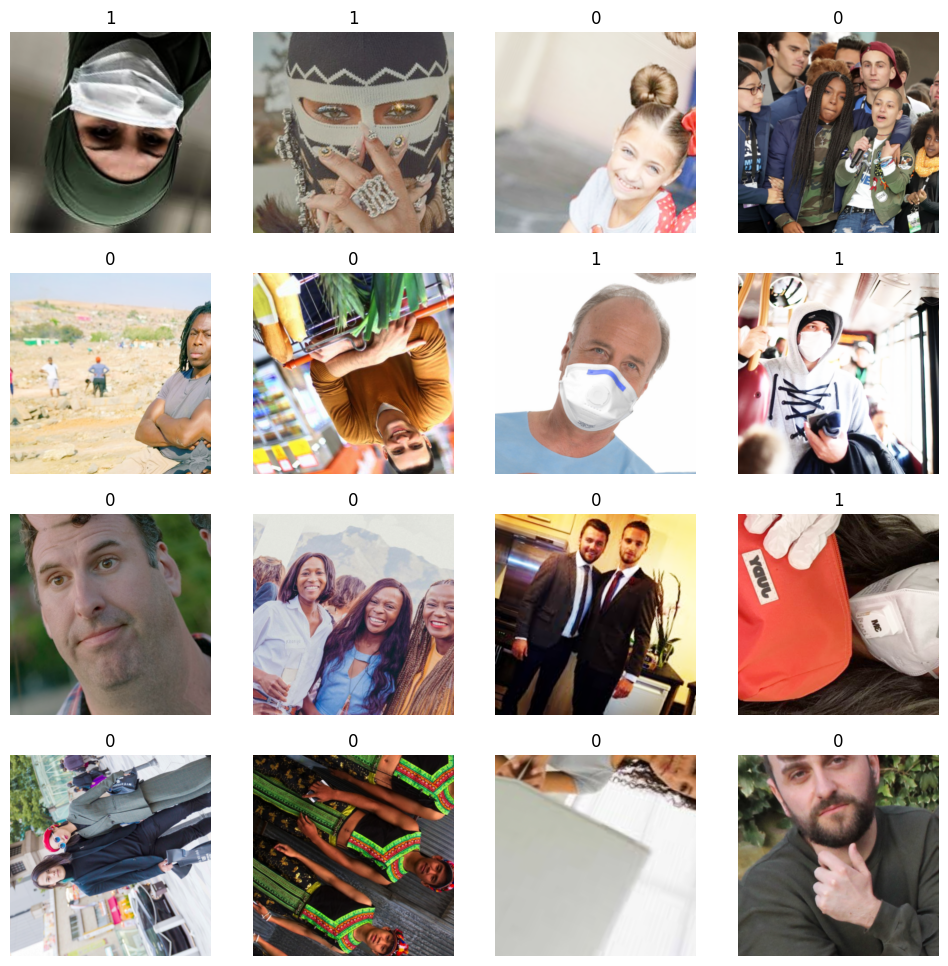

In [40]:
## squish the images

dls = dls.new(item_tfms=Resize(128,ResizeMethod.Squish), batch_tfms = aug_transforms())
dls.show_batch(max_n=16, nrows=4)

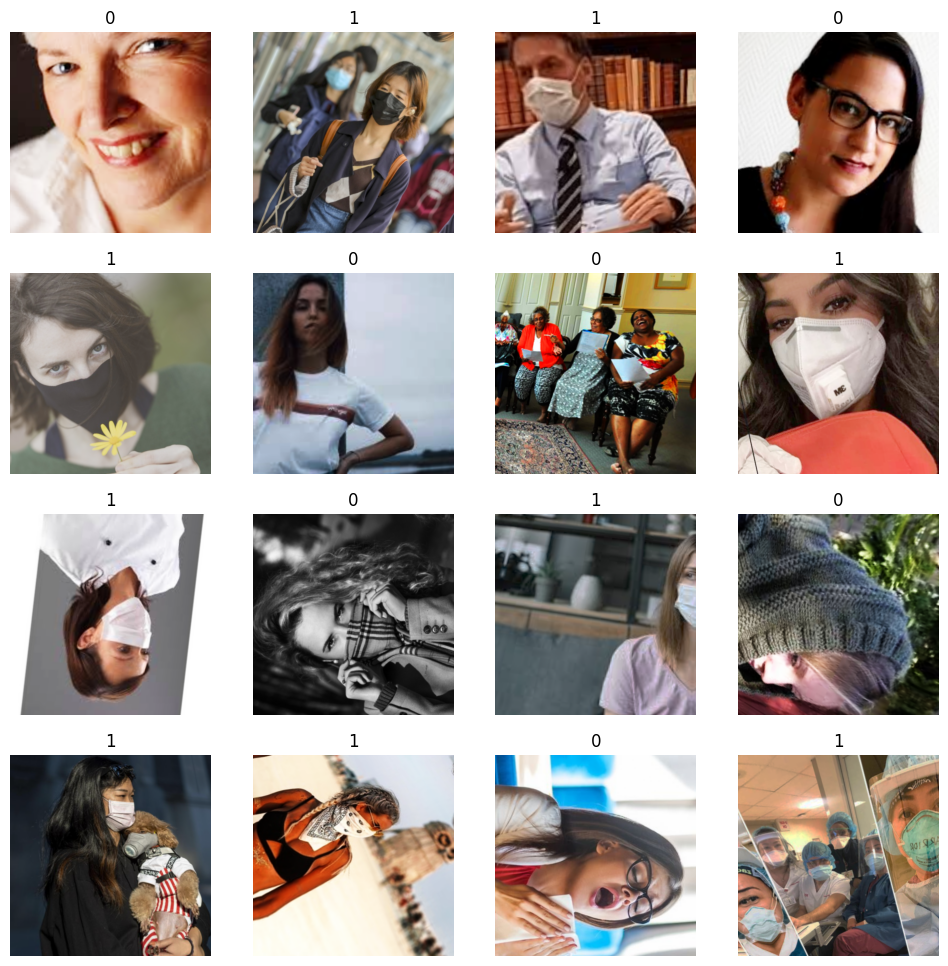

In [41]:
## random cropping

dls = dls.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls.show_batch(max_n=16, nrows=4)

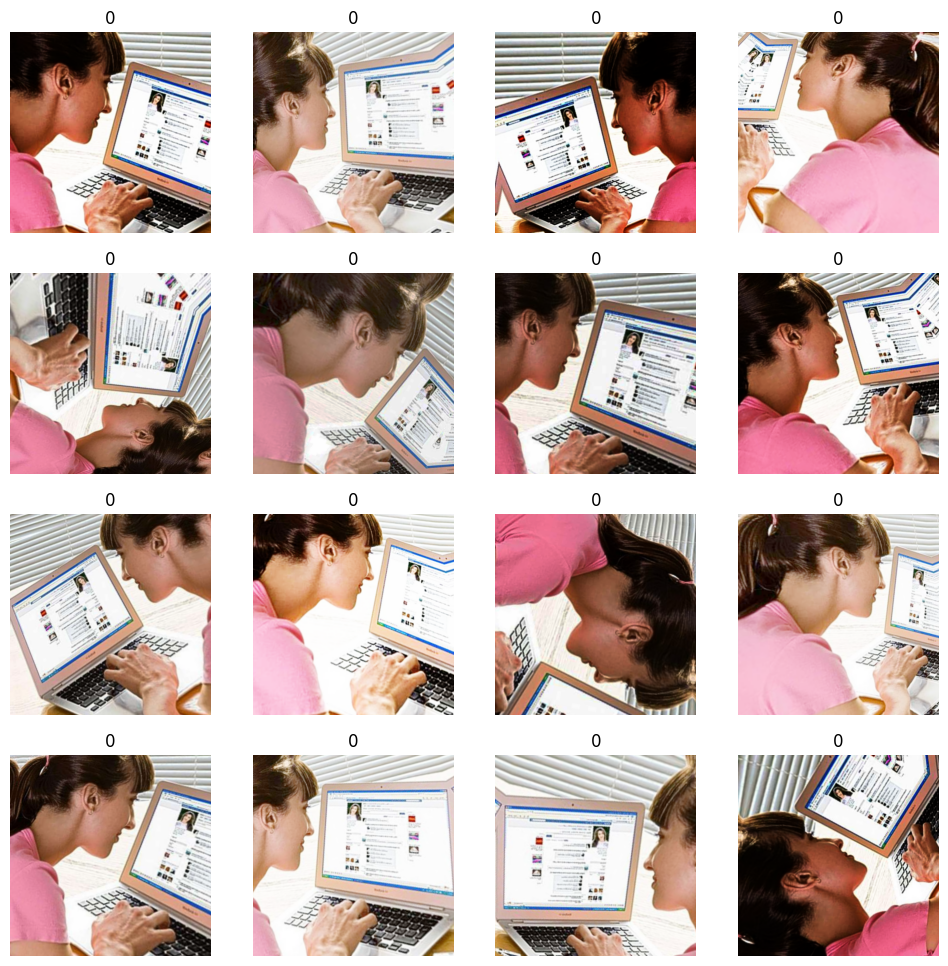

In [42]:
dls = dls.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls.show_batch(max_n=16, nrows=4, unique=True)

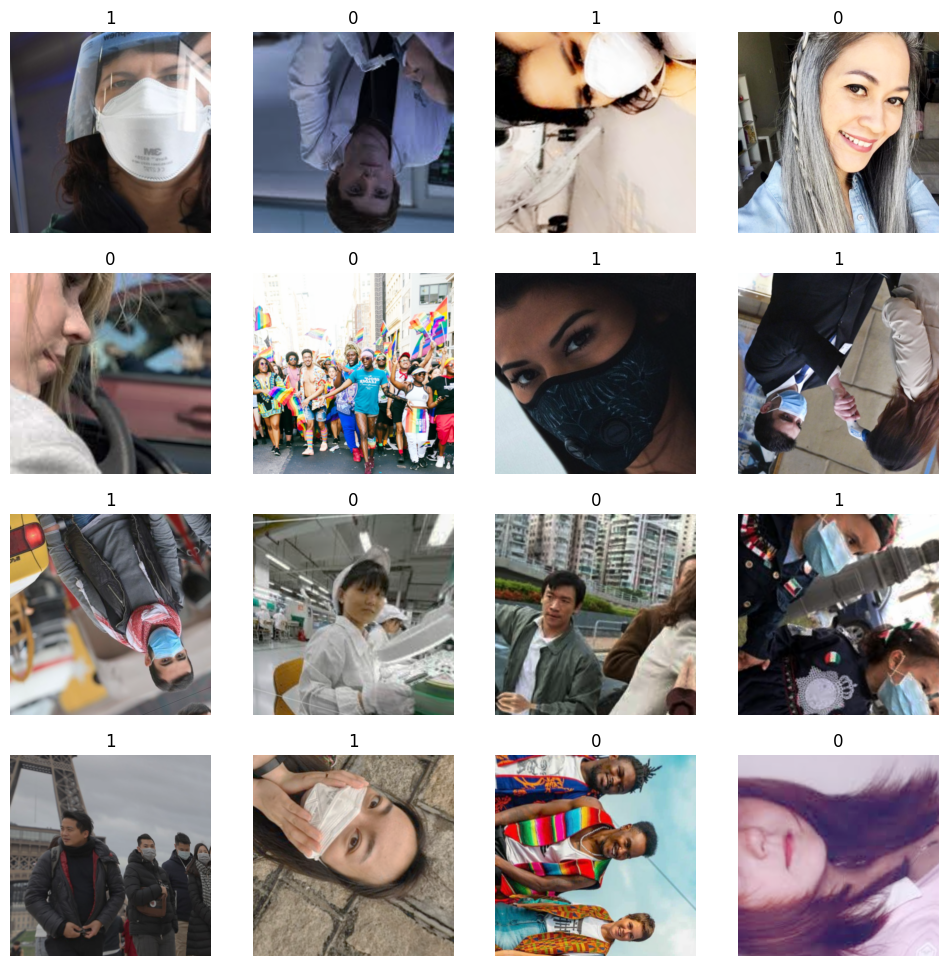

In [43]:
dls = dls.new(items_tfms=Resize(128),batch_tfms=aug_transforms(mult=4))
dls.show_batch(max_n=16, nrows=4)

In [44]:
dls = Nosemask.dataloaders(train_df, bs=32, num_workers=0) #Let's use ours, stay with definitions in databunch

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [45]:
import timm
timm.list_models('res*')

['res2net50_14w_8s',
 'res2net50_26w_4s',
 'res2net50_26w_6s',
 'res2net50_26w_8s',
 'res2net50_48w_2s',
 'res2net50d',
 'res2net101_26w_4s',
 'res2net101d',
 'res2next50',
 'resmlp_12_224',
 'resmlp_24_224',
 'resmlp_36_224',
 'resmlp_big_24_224',
 'resnest14d',
 'resnest26d',
 'resnest50d',
 'resnest50d_1s4x24d',
 'resnest50d_4s2x40d',
 'resnest101e',
 'resnest200e',
 'resnest269e',
 'resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_clip',
 'resnet50_clip_gap',
 'resnet50_gn',
 'resnet50_mlp',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet50x4_clip',
 'resnet50x4_clip_gap',
 'resnet50x16_clip',
 'resnet50x16_clip_gap',
 'resnet50x64_clip',
 'resnet50x64_clip_gap',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101_clip',
 'resnet101_clip_gap',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'resnet152d',
 'resnet

In [46]:
learn = vision_learner(dls,'resnet18', metrics=[accuracy])

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Austine\.cache\huggingface\hub\models--timm--resnet18.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


SuggestedLRs(valley=0.0005754399462603033)

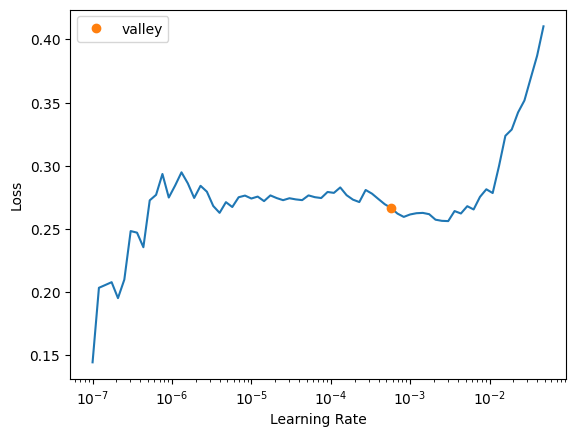

In [52]:
learn.lr_find()

In [53]:
learn.fine_tune(10, base_lr=0.000575439946260303) #use your own base learning rate
# learn.fine_tune(3) # or use defaults

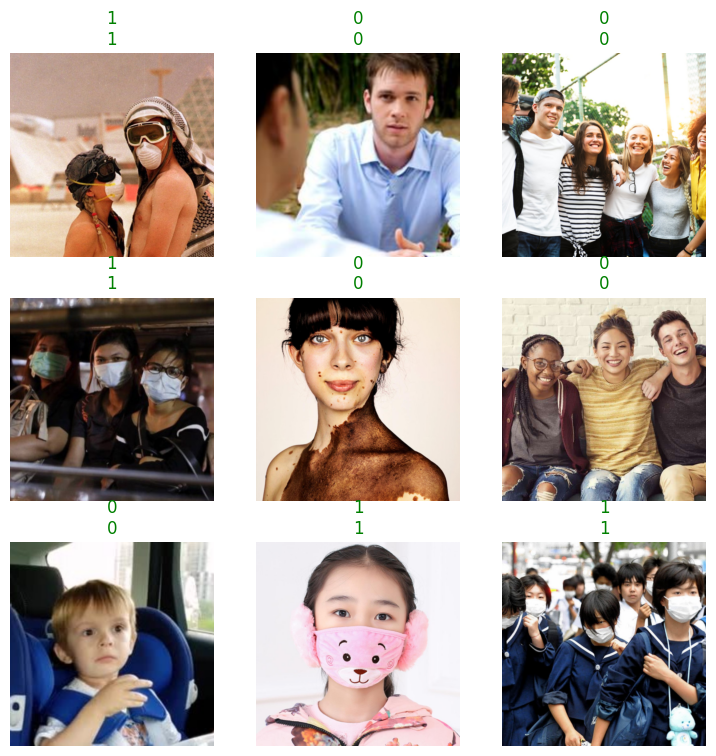

In [54]:
learn.show_results()

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


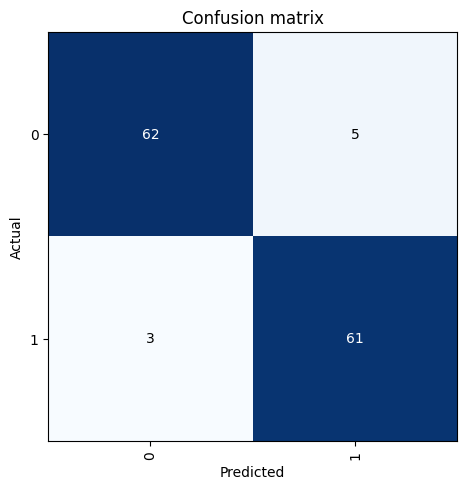

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


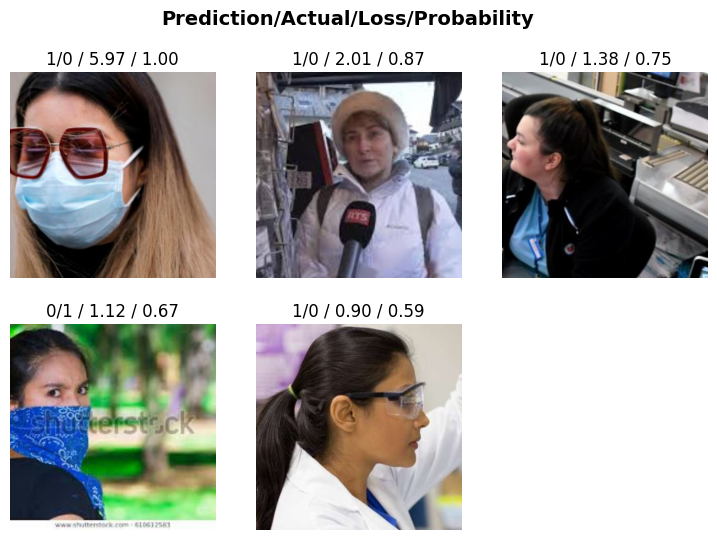

In [56]:
## plot_top_losses which shows us the images with the highest loss in our dataset

interp.plot_top_losses(5)

In [57]:
ss

NameError: name 'ss' is not defined

In [58]:
ss = pd.read_csv("SampleSubmission.csv")

In [59]:
ss.tail(1)

image  target
508  zynasgxnxnzqaallnvkthegctommtu.jpg       0

In [60]:
tdl = dls.test_dl(ss) # quicly create test data loader

In [61]:
test_preds_, test_labels_tta = learn.get_preds(dl=tdl) #Get Preds

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [62]:
# What do these look like?
test_preds_[0] # The first prediction

tensor([0.8873, 0.1127])

In [63]:
train_df.tail()

image  target
1303  hxjwafskxmlfaotwaklzuwuccsbxfu.jpg       0
1304  oyodauphffgmzmvqlykcfvmyxartok.jpg       1
1305  uppvtemhkneqggtbfubeccqjvyefiw.png       1
1306  mzjjvzkzvqmyukzsegtoktaslejcdz.jpg       0
1307  dbjdjyhnbvblwhhnfzaahzhdezbbib.jpg       0

In [65]:
submission = ss.copy()
submission.head()

image  target
0  aadawlxbmapqrblgxyzarhjasgiobu.png       0
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg       0
2  aclkjfvackiieiznzfcwienplielrj.jpg       0
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg       0
4  aelzzshpfxerelefnkatpczktuxjln.jpg       0

In [66]:
submission['target'] = [float(p[1]) for p in test_preds_] # we want p(Mask) for our submission, so we'll look at the second number in each prediction with p[1]
submission.head()

image    target
0  aadawlxbmapqrblgxyzarhjasgiobu.png  0.112728
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg  0.026300
2  aclkjfvackiieiznzfcwienplielrj.jpg  0.999391
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg  0.914946
4  aelzzshpfxerelefnkatpczktuxjln.jpg  0.000452

In [67]:
# Save the file
submission.to_csv('starter_nb_baseline.csv', index=False)

In [68]:
test_preds_tta, test_labels_tta = learn.tta(dl=tdl) #TTA

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [69]:
submission['target'] = [float(p[1]) for p in test_preds_tta]
submission.head()

image    target
0  aadawlxbmapqrblgxyzarhjasgiobu.png  0.095913
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg  0.050680
2  aclkjfvackiieiznzfcwienplielrj.jpg  0.999661
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg  0.361527
4  aelzzshpfxerelefnkatpczktuxjln.jpg  0.001866

In [70]:
# Save the file
submission.to_csv('starter_nb_baseline_with_TTA.csv', index=False)

In [71]:
# Average of two sets of predictions
preds1 = pd.read_csv('starter_nb_baseline.csv')
preds2 = pd.read_csv('starter_nb_baseline_with_TTA.csv')
av_preds = pd.DataFrame({
    'image':preds1['image'],
    'target': 0.5*preds1['target'] + 0.5*preds2['target']
})
av_preds.to_csv('ensemble1.csv', index=False)

# Exercise: Run the minimal example below and combine those predictions with the tta submission from above

# Exercise: If one model is substantailly better, we may want it's predictins to count more towards the final prodiction.
#          Try to use 0.8*good_predictions + 0.2*other_predictions to skey your ensemble predicitons towards the better model's outputs.

# Minimal Example - 10 Lines of Code

We've got a lot of explanation in here, but here is a minimal submission from scratch in only 10 lines of code. You'll notice we're using a fancier model, the Convnext tiny model from Timm. Is it better? You'll have to test and find out.

We're also adding .mixup() since that sounds fancy, and training for longer than the example. Feel free to play with this, and see how good you can get it!

You can read about mixup and friends [here](https://docs.fast.ai/callback.mixup.html#mixup)

Good luck :)


In [72]:
from fastai.vision.all import * #import everthing from vision
import pandas as pd
import timm

In [74]:
train_df = pd.read_csv("train_labels.csv")
submission = pd.read_csv("SampleSubmission.csv")
Nosemask = DataBlock(blocks=(ImageBlock, CategoryBlock), splitter=TrainTestSplitter(0.1, stratify=train_df["target"]),get_x = ColReader(0, pref = "images/images/" ),get_y=ColReader(1),item_tfms = Resize(460), batch_tfms = aug_transforms(do_flip=True,flip_vert=True,max_lighting=0.4,max_zoom=1.2,max_warp=0.2,max_rotate=30,xtra_tfms=None))
dls = Nosemask.dataloaders(train_df, bs=16, num_workers=0)
learn = vision_learner(dls,'convnext_tiny', metrics=[accuracy], path=".") #try convnext_base and convnext_large
learn.fine_tune(3,cbs=MixUp) #Apply Mixup #increase no of Epochs
tdl = dls.test_dl(submission) # quicly create test data loader
test_preds_tta, test_labels_tta = learn.get_preds(dl=tdl) #Get Preds
submission['target'] = [float(p[1]) for p in test_preds_tta]
submission.to_csv('convnext_tiny_model.csv', index=False)

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Austine\.cache\huggingface\hub\models--timm--convnext_tiny.in12k_ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


#### Unlike the 'convnext_tiny', the resnet model shows a 87% accuracy

In [75]:
#will save an export file called a model.pkl
# learn.export('model.pkl')

In [1]:
from fastai.vision.all import * #import everthing from vision
import pandas as pd
import timm

ModuleNotFoundError: No module named 'fastai'

In [1]:
from fastai.vision.all import load_learner

ImportError: cannot import name 'GradScaler' from 'torch.amp' (C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\amp\__init__.py)

In [76]:
new_learner=load_learner("model.pkl")

C:\Users\Austine\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [77]:
new_learner.predict("download.jpg") 

('1', tensor(1), tensor([0.0028, 0.9972]))

In [78]:
new_learner.predict("download_1.jpg")

('0', tensor(0), tensor([9.9953e-01, 4.7259e-04]))